
Authors: Nazanin Moshtagh 400046822 and Aditya Goel 400414715

SEP787 Project: Machine Learning- Classification Models

References: 
1. Dr. Jeff Fortuna's SEP 787 Lecture Notes
2. https://scikit-learn.org/


# **KNN**

##**Import Libraries**

In [ ]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

##**Function to import Dataset**

In [ ]:
def import_dataset(file):
  df = pd.read_csv(file, delimiter = ";", header=None)
  return df

##**Function to convert Multi-Class data into Binary-Class data**

In [ ]:
def convert_to_binary(dataset):
  for i in range(len(dataset)):
    if(dataset[11][i]<=5):                                                      #For values between [0,5], class = 0
      dataset[11][i]=0
      continue
    if(dataset[11][i]>=6):                                                      #For values between [6,10], class = 1      
      dataset[11][i]=1

  return dataset

##**Function to Normalise Data**

In [ ]:
def pre_process(df):
  df.iloc[:,0:-1] = df.iloc[:,0:-1].apply(lambda x: (x-x.mean())/ x.std(), axis=0)
  return df

##**Function to split data into Training and Test sets**

In [ ]:
def split_data(dataset):
  X = dataset.iloc[:,:-1]
  y = dataset[11]
  X_train, X_test, actual_y_train, actual_y_test = train_test_split(X,y,train_size=0.75)
  return [X, y, X_train, X_test, actual_y_train, actual_y_test]

##**Function to find value of K using Cross Validation**

In [ ]:
def perform_crossvalidation():
  n_cv_values = [2,3,4,5,8,10]
  
  for i in n_cv_values:  
    k_value_array = []
    error_array = []

    for k in range(1,40):
      neigh_clf = KNeighborsClassifier(n_neighbors=k)                           #applying KNN model with k nearest neighbor votes
      cv_results = cross_validate(neigh_clf, X_train, y_train, cv=i)            #Evaluating cross validation scores
      accuracy_knn_train = sum(cv_results['test_score'])/len(cv_results['test_score'])                            #Mean of CV['test_score']
      error_rate = 1 - accuracy_knn_train
      error_array.append(error_rate)
      k_value_array.append(k)

    plt.figure()
    plt.title('%i-fold CV' %i)
    plt.xlabel('K')
    plt.ylabel('Error')
    plt.plot(k_value_array, error_array)
    plt.show()

##**Function to calculate metric**

In [ ]:
def calc_metric(data, actual, predicted):
  conf_matrix = confusion_matrix(actual, predicted)                             #Confusion Matrix
  accuracy = accuracy_score(actual, predicted)                                  #Accuracy
  disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
  disp.plot()
  plt.show()

  print('Results for '+data+' data\n')
  print('Confusion Matrix is:\n', conf_matrix)
  print('\nAccuracy is:\n', accuracy)

##**Function to Manually Plot ROC**

In [ ]:
def plot_roc2(y, probability):
  
  threshold_values = np.linspace(0,2,100)                                       #Range of threshold Values
  FPR_array = []
  TPR_array = []

  for threshold in threshold_values:
    y_pred = []

    for p in probability:                                                       #For probability vector of every datapoint
      if ((p[1])<threshold):                                                    
        y_pred.append(0)                                                        #If predicted probability < threshold, classify as 0
        continue
      elif ((p[1])>=threshold): y_pred.append(1)                                #else 1

    conf_matrix = confusion_matrix(y, y_pred)
    TN = conf_matrix[0][0]                                                      #Obtain True Negative
    FP = conf_matrix[0][1]                                                      #Obtain False Positive
    FN = conf_matrix[1][0]                                                      #Obtain False Negative    
    TP = conf_matrix[1][1]                                                      #Obtain True Positive

    FPR = FP/(FP + TN)                                                          #Compute False Positive Rate
    TPR = TP/(TP + FN)                                                          #Compute True Positive Rate

    FPR_array.append(FPR)
    TPR_array.append(TPR)

  fig = plt.figure()
  plt.plot(FPR_array, TPR_array, color= 'red')                                  #Plot ROC
  plt.axis([0,1,0,1])
  plt.ylabel('TPR')
  plt.xlabel('FPR')
  plt.title('ROC Curve')
  plt.savefig('ROC')
  plt.show()

##**Function to Evaluate Time**

In [ ]:
def calc_time(data, start, end):
  time = (end - start)
  print("The Computational Time for " +data+ " the model (in s) = ", time)

# **Main Function**

###**Data Preparation**

In [ ]:
df = import_dataset("winequality-white.csv")                                    #Import Dataset
df = convert_to_binary(df)                                                      #Convert multivariate dataset to a binary dataset
df = pre_process(df)
[X, y, X_train, X_test, y_train, y_test] = split_data(df)                       #Split the dataset into training and test set

###**Training Phase**

### **Fit the Model**

From Cross Validation, optimal value of n-fold CV = 4 and K=14



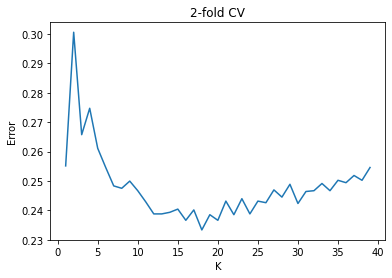

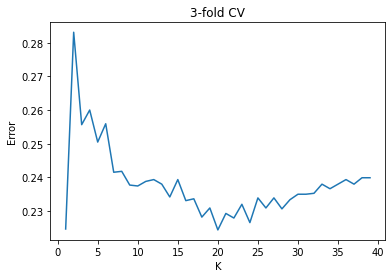

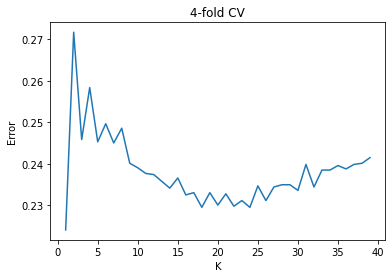

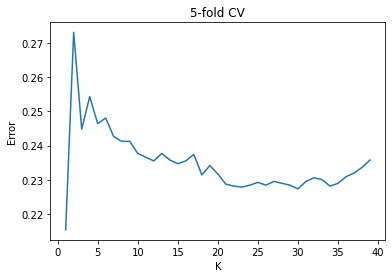

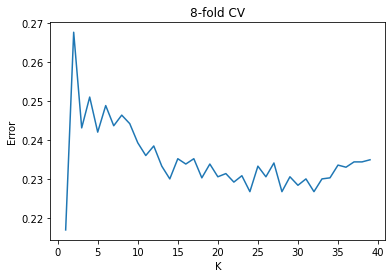

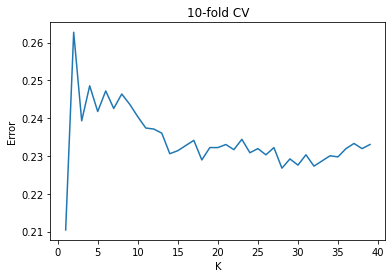

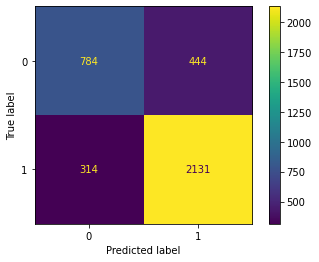

Results for training data

Confusion Matrix is:
 [[ 784  444]
 [ 314 2131]]

Accuracy is:
 0.7936291859515383


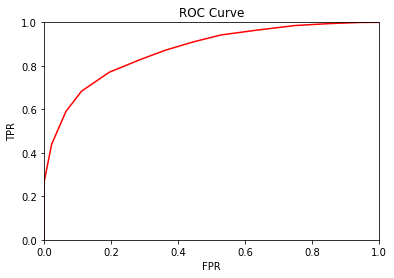

The Computational Time for Training the model (in s) =  65.37466073036194


In [ ]:
print("From Cross Validation, optimal value of n-fold CV = 4 and K=14\n")

start_time_train = time.time()                                                  #start time
perform_crossvalidation()                                                       #Perform Cross Validation

neigh_clf = KNeighborsClassifier(n_neighbors=14)                                #applying KNN model with k nearest neighbor votes
neigh_clf.fit(X_train, y_train)                                                 #Fit the model on the training data

pred_y_train = neigh_clf.predict(X_train)                                       #Predict
calc_metric('training', y_train, pred_y_train)                                  #Compute Accuracy and Confusion

probability = neigh_clf.predict_proba(X_train)
plot_roc2(y_train, probability)                                                 #Manual ROC Curve

end_time_train = time.time()                                                    #end time
calc_time("Training", start_time_train, end_time_train)                          #Computational Time for Training

###**Testing Phase**

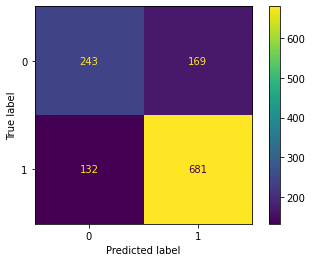

Results for test data

Confusion Matrix is:
 [[243 169]
 [132 681]]

Accuracy is:
 0.7542857142857143


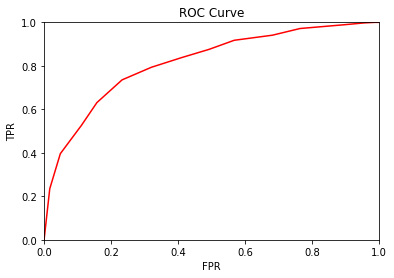

The Computational Time for Testing the model (in s) =  0.5809817314147949


In [ ]:
start_time_test = time.time()                                                   #start time

pred_y_test = neigh_clf.predict(X_test)                                         #Predict
calc_metric('test', y_test, pred_y_test)                                        #Compute Accuracy and Confusion

probability = neigh_clf.predict_proba(X_test)
plot_roc2(y_test, probability)                                                  #Manual ROC Curve

end_time_test = time.time()                                                     #end time
calc_time("Testing",start_time_test, end_time_test)                             #Computational Time for Testing